# Lazy Conditional Gradient

In this quick example, we will walk you through the basic steps of data exploration in a notebook.

In [ ]:
!pip install numdifftools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 14.6 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import check_grad, approx_fprime
import torch
import numdifftools as nd

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


X:  nb, d
z:  nb, 1
mbox: nb, 1
S: nb, nb
Lb: 

<img src="image-20230829-090936.png" width="" align="" />

1, nb x L x  nb, 1 - 1, nb x nb, 1

=>  number

In [ ]:
X = np.random.choice([0, 1], size=(2,3), p=[1./3, 2./3])
A = np.random.choice([0, 1], size=(2,3), p=[1./3, 2./3])


In [ ]:
a = np.array([0, 1, 2, 4, 5])
b = np.array([0, 1, 2, 4, 5])
a @ b.T

46

In [ ]:
nbox = 2
mdim = 10

In [ ]:
Z = np.ones(shape=(nbox, 1))
A = np.ones(shape=(nbox, nbox))
m = np.ones(shape=(nbox, 1))

In [ ]:
def f(x):
    #t1: mdim, nbox
    # x = x.reshape((nbox, 1))
    t1 = np.dot(x.T, A)
    #t2: mxim, mdim
    # print("t1.shapef= {}".format(t1.shapt3)
    t2 = np.dot(t1, x)
    # print("t2.shape = {}".format(t2.shape))
    t3 = t2 - np.dot(x.T, m)
    return t3[0,0]

In [ ]:
def grad_f(x):
    # grad = nd.Gradient(f)(x)
    grad = np.dot(x.T, A) - m.T
    return grad.T

In [ ]:
def grad_2_f(x):
    print("caculate grad 2..")
    grad = nd.Gradient(grad_f)([x])
    # grad = A
    return grad

In [ ]:
grad_f(Z)

array([[1.],
       [1.]])

In [ ]:
# def grad_x_i(x):
#   pidx = x > 0
#   npidx = x <= 0
#   grad = np.ones(shape=x.shape)
#   grad[pidx] = grad_x(x)[pidx]
#   grad[npidx] = -1
#   return grad

In [ ]:
# def oracle(linear_obj):
#   v = -1 if linear_obj > 0 else 1
#   return v
def oracle(linear_obj, size):
  result = np.zeros(size)
  result = np.expand_dims(result, axis=1)
  if linear_obj is None:
    result[0] = 1
  else:
    i = np.argmax(np.abs(linear_obj))
    result[i] = -1 if linear_obj[i, 0] > 0 else 1
  return result

In [ ]:
def LPSep(linear_obj, size, X, cache, acc):
  for Xs in cache:
    if np.dot(linear_obj.T, X - Xs) > acc:
      return Xs
  y = oracle(-linear_obj, size)
  if np.dot(linear_obj.T, X - y) > acc:
    cache.append(y)
    return y
  else:
    return False

In [ ]:
def LCG_optimizer(initial, max_iter):
  Xs = [initial]
  f_cache = []
  y_cache = []
  K = 1.1
  phi = 0
  for i in range(1, max_iter):
    step = 2 / (i + 2)
    cc = grad_f(Xs[-1])
    phi = (phi + 0.5 * step**2) / (1 + step / K)
    acc = phi / K
    v = LPSep(cc, 2, Xs[-1], y_cache, acc)
    if not isinstance(v, bool):
      Xs.append(Xs[-1]  + step * (v - Xs[-1]))
    else:
      Xs.append(Xs[-1])
    f_cache.append(f(Xs[-1]))
  return Xs[-1], f_cache


In [ ]:
def run():
  X0 = np.ones(shape=(nbox, 1))
  solution, f_cache = LCG_optimizer(X0, 100)
  print(solution)
  return f_cache

[[1.        ]
 [0.14281088]]
[0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.44444444444444464, 0.37234567901234583, 0.37234567901234583, 0.37234567901234583, 0.37234567901234583, 0.37234567901234583, 0.37234567901234583, 0.37234567901234583, 0.3315988164473014, 0.3315988164473014, 0.3315988164473014, 0.3315988164473014, 0.3315988164473014, 0.3315988164473014, 0.30333847649864976, 0.30333847649864976, 0.30333847649864976, 0.30333847649864976, 0.30333847649864976, 0.2815684527410207, 0.2815684527410207, 0.2815684527410207, 0.2815684527410207, 0.2815684527410207, 0.2641322772420813, 0.2641322772420813, 0.2641322772420813, 0.2641322772420813, 0.2641322772420813, 0.24975815722101546, 0.24975815722101546, 0.24975815722101546, 0.24975815722101546, 0.24975815722101546, 0.23764164489947515, 0.23764164489947515,

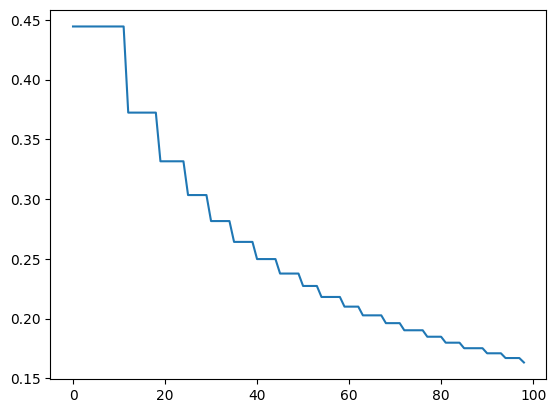

In [ ]:
logs = run()
print(logs)
plt.plot([i for i in range(len(logs))], logs)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3a6c38e-c1ad-4c3f-be18-5bd6ae24b2f4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>